In [1]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
    """
    Cria um dataset para regressão com função geradora com
    inclinação e interceptação do eixo vertical parametrizados.
    """
    X = np.random.uniform(size=(n,1))
    AUX = np.random.rand(n,1)-0.5
    y = X*slop+intercept + AUX*0.1
    y = y.flatten()
    return X, y

slop = 0.5
intercept = 0.2
Xtr, ytr = criaDatasetRegressão(n=20, slop=slop, intercept=intercept)
Xtr.T, ytr.T

(array([[0.82375238, 0.1373755 , 0.03334203, 0.48315096, 0.24643057,
         0.1759887 , 0.57539792, 0.1126021 , 0.12529054, 0.57613481,
         0.40289008, 0.88285538, 0.59027212, 0.45025954, 0.31066581,
         0.4137605 , 0.9014144 , 0.11397199, 0.42002   , 0.36431839]]),
 array([0.57365396, 0.28098092, 0.20019749, 0.44728267, 0.29854883,
        0.27313718, 0.45042576, 0.26566842, 0.30573552, 0.49854437,
        0.40081155, 0.61408502, 0.46519564, 0.38048518, 0.32206103,
        0.35817513, 0.67778691, 0.30395751, 0.45938693, 0.36435379]))

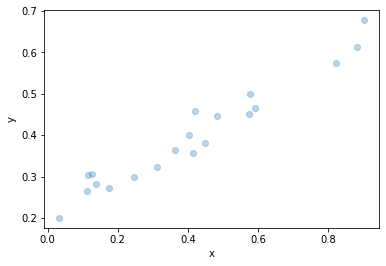

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetRegressão(X, y):
    """
    Plota um dataset de regressão.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:,0], y, "o", alpha=0.3)

plotaDatasetRegressão(Xtr, ytr)

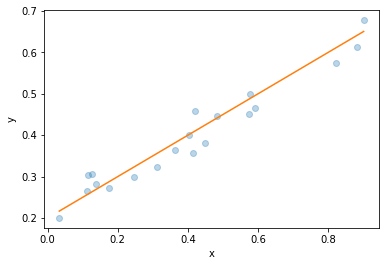

In [3]:
def plotaFunçãoDatasetRegressão(X, y, slop, intercept=0):
    """
    Plota um dataset de regressão com uma função definida por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    xmin = min(X)
    xmax = max(X)
    xs = np.linspace(xmin, xmax, num=2)
    ys = xs * slop+intercept
    plotaDatasetRegressão(X, y)
    plt.plot(xs,ys)

plotaFunçãoDatasetRegressão(Xtr, ytr, slop, intercept)

In [4]:
def mse(yactual, ypred):
    return sum((yactual - ypred)**2)/len(yactual)

def rmse(yactual, ypred):
    return np.sqrt(mse(yactual, ypred))

0.029029930180068376
[0.20644572 0.46825665]


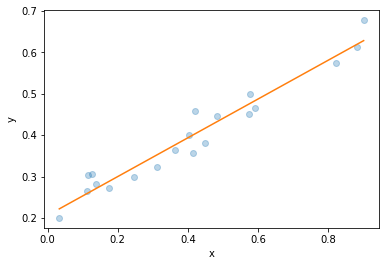

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron para regressão,
    treinado com a pseudo-inversa.
    """
    def __init__(self):
        self.w = None
        self.activation = lambda a: a
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.linalg.pinv(Xb) @ y

    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return Xb @ self.w

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(rmse(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaFunçãoDatasetRegressão(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


In [6]:
Xte, yte = criaDatasetRegressão(n=1000, slop=slop, intercept=intercept)

0.03170683495473885


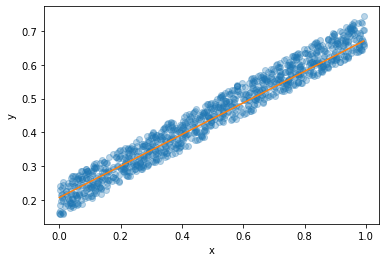

In [7]:
print(rmse(yte, perceptron.predict(Xte)))
plotaFunçãoDatasetRegressão(Xte, yte, perceptron.w[1:], perceptron.w[0])
